# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Generate data set with noise

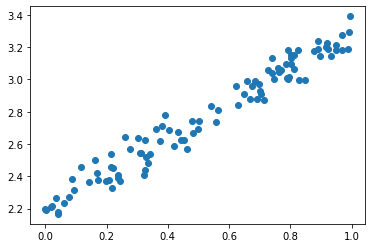

In [2]:
# Original parameters for slope and intercept
m = 1.1
c = 2.2

x = np.random.random((100))
y = m * x + c + np.random.normal(0, 0.07, len(x))
plt.scatter(x, y)

## Finding parameters with grid search

Grid search estimates: 1.1616161616161618, 2.1717171717171713


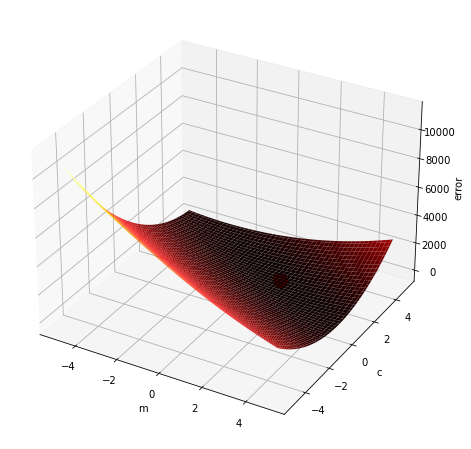

In [3]:
@np.vectorize
def error_fun(m, c):
    pred_y = x * m + c
    return np.sum((pred_y - y)**2)

m = np.linspace(-5, 5, 100)
c = np.linspace(-5, 5, 100)

M, C = np.meshgrid(m, c)
error = error_fun(M, C)

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")
ax.plot_surface(M, C, error, cmap='hot', edgecolor='none')
ax.set_xlabel('m')
ax.set_ylabel('c')
ax.set_zlabel('error')


min_location = np.unravel_index(error.argmin(), error.shape)
ax.scatter(M[min_location], C[min_location], error[min_location], c="red", s=200)
print(f"Grid search estimates: {M[min_location]}, {C[min_location]}")


## Finding parameters with least squares

Find the optimal solution for $$ Ax = b $$

In [4]:
A = np.vstack([x, np.ones(len(x))]).T
m_lstsq, c_lstsq = np.linalg.lstsq(A, y, rcond=None)[0]
print(f"Least square estimates: {m_lstsq}, {c_lstsq}")

Least square estimates: 1.0860626685827295, 2.2019956704473653


## Finding paremeters with scikit-learn

In [5]:
from sklearn import linear_model

estimator = linear_model.LinearRegression()
X = x.reshape(-1, 1)
estimator.fit(X, y)
print(f"Scikit-learn linear regression estimates: {estimator.coef_}, {estimator.intercept_}")

Scikit-learn linear regression estimates: [1.08606267], 2.2019956704473653


## Do a proper train/test evaluation with scikit-learn

Score (R2): 0.944451460270841


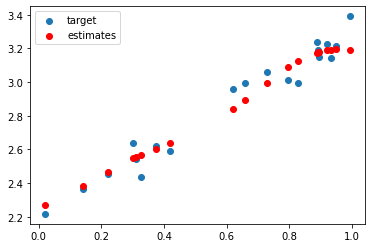

In [6]:
from sklearn import linear_model, svm

estimator = svm.SVR()
X = x.reshape(-1, 1)

training_size = int(X.shape[0] * 0.8)
X_train, y_train = X[:training_size], y[:training_size]
X_test, y_test = X[training_size:], y[training_size:]

estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)

plt.scatter(X_test[:, 0], y_test, label="target")
plt.scatter(X_test[:, 0], y_test_pred, color="red", label="estimates")
plt.legend()

score = estimator.score(X_test, y_test)
print(f"Score (R2): {score}")
